# Mining Twitter

***Source:***
https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/ipynb/Chapter%201%20-%20Mining%20Twitter.ipynb

In [38]:
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt

### Authorizing an application to access Twitter account data

In [2]:
import twitter

CONSUMER_KEY = 'g9cb75kDz5rGwksO2Zdd2L08g'
CONSUMER_SECRET ='TcQTh7GJVqnif2XNGh5oyQLIBkqjyhWJI9schlyZ6Q0O1ZGr7f'
OAUTH_TOKEN = '236827879-5eXYWjODo5PdMsRd3yRSQUJTs0PPKcJY3t7GHy0r'
OAUTH_TOKEN_SECRET = 'PHgFDuempE9GdW8VUYfcTntakF1xCknILmKAIvcTstoaf'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print twitter_api

### Example retrieving trends for 'Where on Earth' ID 1

In [9]:
world_trends = twitter_api.trends.place(_id=1)
us_trends = twitter_api.trends.place(_id=23424977)

print world_trends
print '---'
print us_trends

[{u'created_at': u'2017-12-30T02:10:49Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23Retrospectiva2017', u'query': u'%23Retrospectiva2017', u'tweet_volume': 21928, u'name': u'#Retrospectiva2017', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23%D8%A7%D9%85%D9%86%D9%8A%D8%AA%D9%83_%D8%B3%D9%86%D9%87_2018', u'query': u'%23%D8%A7%D9%85%D9%86%D9%8A%D8%AA%D9%83_%D8%B3%D9%86%D9%87_2018', u'tweet_volume': 54534, u'name': u'#\u0627\u0645\u0646\u064a\u062a\u0643_\u0633\u0646\u0647_2018', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23CottonBowl', u'query': u'%23CottonBowl', u'tweet_volume': 11253, u'name': u'#CottonBowl', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23%D9%84%D9%84%D9%8A%D9%84_%D9%83%D9%84%D9%85%D9%87', u'query': u'%23%D9%84%D9%84%D9%8A%D9%84_%D9%83%D9%84%D9%85%D9%87', u'tweet_volume': 13992, u'name': u'#\u0644\u0644\u064a\u0644_\u0643\u0644\u0645\u0647', u'promoted_content': None}, {u'url': u'http://

In [6]:
print json.dumps(world_trends, indent=1)

[
 {
  "created_at": "2017-12-30T02:10:49Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23Retrospectiva2017", 
    "query": "%23Retrospectiva2017", 
    "tweet_volume": 21928, 
    "name": "#Retrospectiva2017", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D8%A7%D9%85%D9%86%D9%8A%D8%AA%D9%83_%D8%B3%D9%86%D9%87_2018", 
    "query": "%23%D8%A7%D9%85%D9%86%D9%8A%D8%AA%D9%83_%D8%B3%D9%86%D9%87_2018", 
    "tweet_volume": 54534, 
    "name": "#\u0627\u0645\u0646\u064a\u062a\u0643_\u0633\u0646\u0647_2018", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23CottonBowl", 
    "query": "%23CottonBowl", 
    "tweet_volume": 11253, 
    "name": "#CottonBowl", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D9%84%D9%84%D9%8A%D9%84_%D9%83%D9%84%D9%85%D9%87", 
    "query": "%23%D9%84%D9%84%D9%8A%D9%84_%D9%83%D9%84%D9%85%D9%87", 
    "tweet_volume": 13992, 
    "name": "#\

### Computing the intersection of two sets of trends

In [12]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print world_trends_set
print '---'
print common_trends

set([u'#\u0627\u0644\u0628\u0627\u0642\u0627\u064a\u0627\u062a_\u0627\u0644\u0635\u0627\u0644\u062d\u0627\u062a', u'#\u0633\u0646\u0646\u0642\u0644_\u0627\u0644\u0645\u0639\u0631\u0643\u0647_\u0627\u0644\u064a_\u0627\u064a\u0631\u0627\u0646', u'#\u0628\u062f\u0627\u064a\u0647_\u0627\u0644\u0633\u0646\u0647_\u0627\u0644\u062c\u062f\u064a\u062f\u0647_\u0627\u0642\u0648\u0644', u'#ConvosWithEmery', u'#SomosLH', u'#RaoulTeQueremos', u'#NewYearsHonours', u'Stephen Johnson', u'#Iranprotests', u'#ParaEl2018Quiero', u'Ohio State', u'Hang the DJ', u'Sue Grafton', u'\u8a2d\u55b6\u5b8c\u4e86', u'#PrimerPlano', u'#ParoNacionalDocenteEnEnero', u'#Retrospectiva2017', u'#\u0634\u064a_\u064a\u062c\u0631\u062d\u0643_\u0627\u0630\u0627', u'#BelkBowl', u'#CrotoneNapoli', u'SDV SO FCS', u'#WizRockets', u'#ThingsNeverSaidIn2017', u'#ViernesIntratable', u'Karmichael Hunt', u'#\u0627\u0644\u0633\u0639\u0627\u062f\u0647_\u062f\u0627\u064a\u0645', u'Nick Bosa', u'#\u0627\u0645\u0646\u064a\u062a\u0643_\u0633\u0

### Collecting search results

In [18]:
# Import unquote to prevent url encoding errors in next_results
from urllib import unquote

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#BridgetJones' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses[0], indent=1)

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 400
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @ARTEfr: Marre de la solitude ?\nD\u00e9couvrez les bons plans de #BridgetJones pour trouver l'amour \u00e0 #Londres ! \ud83d\udc96\nhttps://t.co/WeARqFwLT9 ht\u2026", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 946912272013758464, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 14140057, 
    "indices": [
     3, 
     10
    ], 
    "id_str": "14140057", 
    "screen_name": "ARTEfr", 
    "name": "ARTE"
   }
  ], 
  "hashtags": [
   {
    "indices": [
     63, 
     76
    ], 
    "text": "BridgetJones"
   }, 
   {
    "indices": [
     100, 
     108
    ], 
    "text": "Londres"
   }
  ], 
  "urls": [
   {
    "url": "https://t.co/WeARqFwLT9", 
    "indices": [
     113, 
     136
    ], 
    "expanded_url": "http://bit.ly/Bjones", 
    "di

### Extracting text, screen names, and hashtags from tweets

In [28]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "RT @ARTEfr: Marre de la solitude ?\nD\u00e9couvrez les bons plans de #BridgetJones pour trouver l'amour \u00e0 #Londres ! \ud83d\udc96\nhttps://t.co/WeARqFwLT9 ht\u2026", 
 "#Christmas #bridgetjones https://t.co/MnenJn2pJN", 
 "Love Bridget Jones' Baby @edsheeran is the guy from starbucks \ud83d\ude02\ud83d\ude02 #bridgetjones\n#bridgetjonesbaby #EdSheeran", 
 "RT @ARTEfr: Marre de la solitude ?\nD\u00e9couvrez les bons plans de #BridgetJones pour trouver l'amour \u00e0 #Londres ! \ud83d\udc96\nhttps://t.co/WeARqFwLT9 ht\u2026", 
 "C\u2019\u00e8 un po\u2019 di #BridgetJones in tutti noi maschio o femmina che sia"
]
[
 "ARTEfr", 
 "edsheeran", 
 "ARTEfr", 
 "AlemDergisi", 
 "mariarosevogler"
]
[
 "BridgetJones", 
 "Londres", 
 "Christmas", 
 "bridgetjones", 
 "bridgetjones"
]
[
 "RT", 
 "@ARTEfr:", 
 "Marre", 
 "de", 
 "la"
]


### Creating a basic frequency distribution from the words in tweets

In [30]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print '---'
    print

[(u'#BridgetJones', 168), (u'#bridgetjones', 133), (u'de', 96), (u'RT', 73), (u'a', 65), (u'la', 56), (u'en', 45), (u'the', 43), (u'Bridget', 42), (u'and', 39)]
---

[(u'ARTEfr', 30), (u'laSextaTV', 12), (u'VOXde', 6), (u'CFAddicted', 4), (u'ecartelera', 3), (u'ITV', 3), (u'CsarWalls', 3), (u'_Azahara14', 2), (u'Scarfie1', 2), (u'CF_OutsourceUK', 2)]
---

[(u'BridgetJones', 208), (u'bridgetjones', 147), (u'Londres', 32), (u'ColinFirth', 15), (u'Christmas', 7), (u'LoveActually', 6), (u'Navidad', 5), (u'MarkDarcy', 5), (u'HughGrant', 4), (u'TheHoliday', 4)]
---



### Calculating lexical diversity for tweets¶

In [31]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.43284920208
0.514925373134
0.29696969697
13.9425


### Finding the most popular retweets

In [35]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

sorted(retweets, reverse=True)[:5]

[(18,
  u'ARTEfr',
  u"RT @ARTEfr: Marre de la solitude ?\nD\xe9couvrez les bons plans de #BridgetJones pour trouver l'amour \xe0 #Londres ! \U0001f496\nhttps://t.co/WeARqFwLT9 ht\u2026"),
 (18,
  u'ARTEfr',
  u"RT @ARTEfr: Marre de la solitude ?\nD\xe9couvrez les bons plans de #BridgetJones pour trouver l'amour \xe0 #Londres ! \U0001f496\nhttps://t.co/WeARqFwLT9 ht\u2026"),
 (18,
  u'ARTEfr',
  u"RT @ARTEfr: Marre de la solitude ?\nD\xe9couvrez les bons plans de #BridgetJones pour trouver l'amour \xe0 #Londres ! \U0001f496\nhttps://t.co/WeARqFwLT9 ht\u2026"),
 (18,
  u'ARTEfr',
  u"RT @ARTEfr: Marre de la solitude ?\nD\xe9couvrez les bons plans de #BridgetJones pour trouver l'amour \xe0 #Londres ! \U0001f496\nhttps://t.co/WeARqFwLT9 ht\u2026"),
 (18,
  u'ARTEfr',
  u"RT @ARTEfr: Marre de la solitude ?\nD\xe9couvrez les bons plans de #BridgetJones pour trouver l'amour \xe0 #Londres ! \U0001f496\nhttps://t.co/WeARqFwLT9 ht\u2026")]

### Looking up users who have retweeted a status

In [36]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=946912272013758464)
print [r['user']['screen_name'] for r in _retweets]

[]


### Plotting frequencies of words

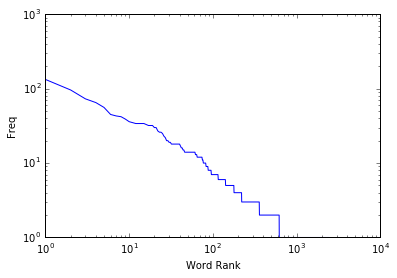

In [39]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

### Generating histograms of words, screen names, and hashtags

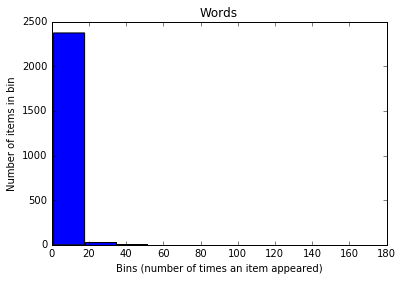

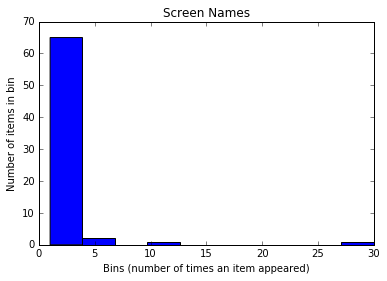

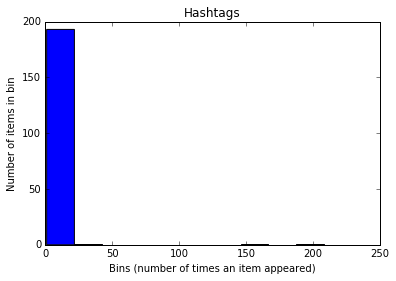

In [40]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

###  Generating a histogram of retweet counts¶

[18, 18, 2, 2, 18, 18, 18, 18, 18, 18, 18, 1, 1, 18, 18, 16, 18, 18, 18, 18, 18, 18, 16, 1, 4, 1, 1, 2, 2, 1, 2, 2, 16, 16, 3, 16, 1, 3, 3, 16, 16, 16, 16, 16, 16, 16, 16, 4, 1, 1, 2, 2, 6, 1, 1, 6, 6, 6, 6, 6, 4, 4, 1, 2, 2, 1, 3, 3, 2, 1, 2, 2, 1]


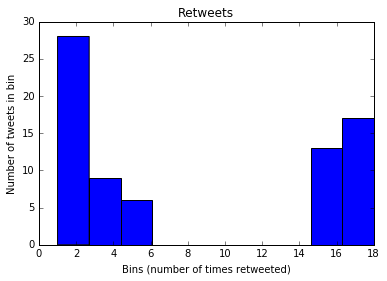

In [41]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print counts

[ 2.89037176  2.89037176  0.69314718  0.69314718  2.89037176  2.89037176
  2.89037176  2.89037176  2.89037176  2.89037176  2.89037176  0.          0.
  2.89037176  2.89037176  2.77258872  2.89037176  2.89037176  2.89037176
  2.89037176  2.89037176  2.89037176  2.77258872  0.          1.38629436
  0.          0.          0.69314718  0.69314718  0.          0.69314718
  0.69314718  2.77258872  2.77258872  1.09861229  2.77258872  0.
  1.09861229  1.09861229  2.77258872  2.77258872  2.77258872  2.77258872
  2.77258872  2.77258872  2.77258872  2.77258872  1.38629436  0.          0.
  0.69314718  0.69314718  1.79175947  0.          0.          1.79175947
  1.79175947  1.79175947  1.79175947  1.79175947  1.38629436  1.38629436
  0.          0.69314718  0.69314718  0.          1.09861229  1.09861229
  0.69314718  0.          0.69314718  0.69314718  0.        ]


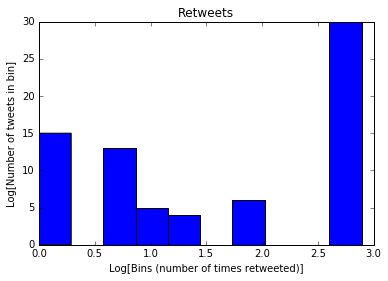

In [43]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well. Try it back on
# Example 13 and see if it helps.

plt.hist(np.log(counts))
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')

print np.log(counts)